In [19]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [20]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine, inspect, func

In [21]:
 #Create an engine to a SQLite database file called `surfsup.sqlite`
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
from sqlalchemy.orm import Session

In [22]:
# Connect to database to be able to run test queries
session = Session(bind=engine)

inspector = inspect(engine)
inspector.get_table_names()


from sqlalchemy.ext.automap import automap_base

# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station


In [23]:

# Query all tobs values
results = session.query(Measurement.tobs).all()

# Convert list of tuples into normal list
tobs_values = list(np.ravel(results))
len(tobs_values)

# Query for last 12 months of precipitation
last_12_months_precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

len(last_12_months_precipitation)

2223

In [24]:
# Set above query results to dataframe
df_last12months_precipitation = pd.DataFrame(data=last_12_months_precipitation)
df_last12months_precipitation.head(10)

df_last12months_precipitation = df_last12months_precipitation.set_index("date")
df_last12months_precipitation.head(10)

# Define  x-ticks labels
mths = ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]

# Define X and Y values
y = df_last12months_precipitation["prcp"].tolist()
x = np.arange(0, len(df_last12months_precipitation.index.tolist()), 1)

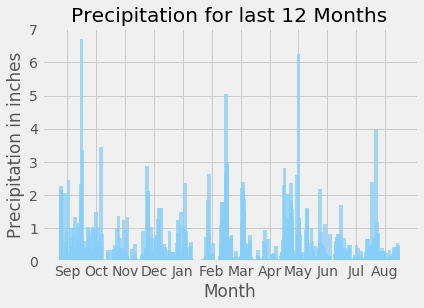

In [27]:
# Define X-tick labels (months) and their positioning
mth_total = len(y)
mth_steps = int((mth_total / 12)*1.03)

tick_locs = [x+55 for x in range(1, mth_total, mth_steps)]

# Define plot
plt.bar(x, y, width=25, color="lightskyblue", alpha=0.75, align="edge")

# Define labels
plt.title("Precipitation for last 12 Months")
plt.xlabel("Month")
plt.ylabel("Precipitation in inches")
plt.xticks(tick_locs, mths)
plt.ylim = max(y) + 1

plt.show()


In [16]:
# Total number of stations
totalnumber_of_stations = session.query(func.count(Station.station)).first()


# Print results of above count query
print(f"Total number of stations: {str(totalnumber_of_stations[0])}")


# What are the most active stations?
# List the stations and the counts of station observations in descending order.
station_list = engine.execute("SELECT station, count(station) FROM measurement GROUP BY station \
                               ORDER BY count(station) DESC").fetchall()

station_list

Total number of stations: 9


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Query to find the most active stations
active_stations_descending = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

# Set above query results to dataframe
df_active_stations_descending = pd.DataFrame(data=active_stations_descending, columns=['Station', 'Count'])
df_active_stations_descending.head()

# Set station with highest number of observations to a variable
station_with_most_observations = df_active_stations_descending["Station"][0]
most_observations = df_active_stations_descending["Count"][0]
print(f"Station with most observations ({most_observations}): {station_with_most_observations}")

# Query for temperature counts (a) for the last year and (b) at the most active station
temperature_frequencies = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-24').\
    filter(Measurement.station == station_with_most_observations).\
    order_by(Measurement.tobs).all()

Station with most observations (2772): USC00519281


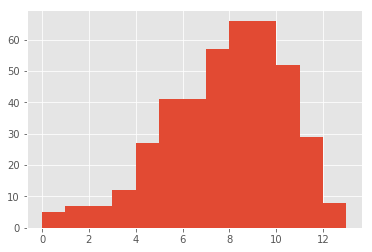

In [18]:
    
#temperature_frequencies

# Define the histogram from the above dataset, with 12 bins
hist, bins = np.histogram(temperature_frequencies, bins=12)
x = np.arange(1,13,1)
# Set bar width to the number of values between each bin
width = bins[1] - bins[0]

# Plot the bar graph from the histogram data
plt.bar(x, hist, width=width)

plt.grid(True)

#plt.legend(loc='best')
           
plt.show()